# Titanic Data Analysis

I will be analysing the chances of survival by answering the questions below.

I will checking whether there are null values in each column.

The groupby function which I will be using in my analysis automatically discards the null value.

In some cases it better to discard the null values , for example if we want to count the number of people under age of 5 , if I fill the null values with zero then it will all the people including zero value and give wrong result.


Q1) The number of people who survived and who didn't?

Q2) The number of people who survived and their class (Pclass)?

Q3) The percentage of survival according to sex?

Q4) The pecentage of survival taking in account class and sex?

Q5) The survival rate according to age?

Q6) The survival rate according to fare?

Q7) Survival rate according to port embarked?

Q8) Survival rate according to port embarked and sex?

Q9) What was the distribution according to age , class ,sex , embarked ?

0 implies Perished 

1 implies Survived 

Name and Ticket column do not help in analysing the survival rate , so I have not considered them.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
t_df = pd .read_csv('/Users/aishwaryapatil/Desktop/titanic-data.csv')

In [3]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

Checking whether there are null values in survived column

In [4]:
s = t_df['Survived']
s.isnull().any()

False

False implies there are no null values

In [5]:
surv = t_df.groupby('Survived').size()
surv

Survived
0    549
1    342
dtype: int64

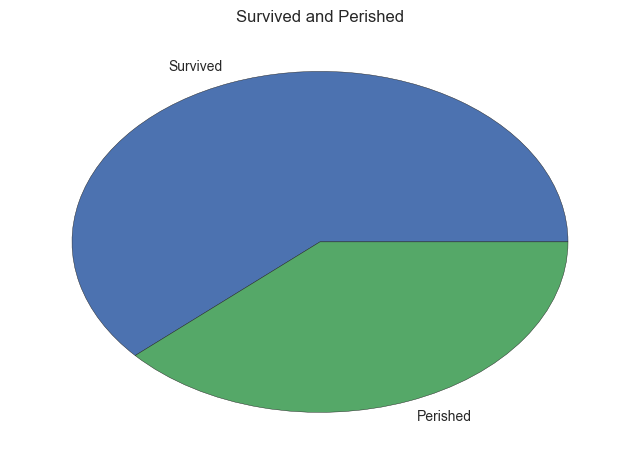

In [6]:
labels = 'Survived' ,'Perished'
surv.plot.pie(title = 'Survived and Perished' , labels = labels  )
plt.ylabel('')
plt.show()

As seen from the above graph the number of people who didn't survive are more than the number of people who survived.

Q 2 ) The number of people who survived and their class (Pclass)?

Checking for null values in Pclass column

In [7]:
p = t_df['Pclass']
p.isnull().any()

False

False implies there are no null values

In [8]:
pclasssurvived = t_df.groupby(['Survived','Pclass']).size().unstack()
pclasssurvived

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


The number of people in class 3 are more than the number other two classes. So to make a comparison we need to calculate the percentage of survival according to each class. 

Percentage of survived according to Pclass

In [9]:
p = pd.DataFrame(pclasssurvived)
q = p.astype(float).fillna(0.0)
pct = q.groupby(level=0).apply(lambda x: 100*x/q.sum())
pct

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


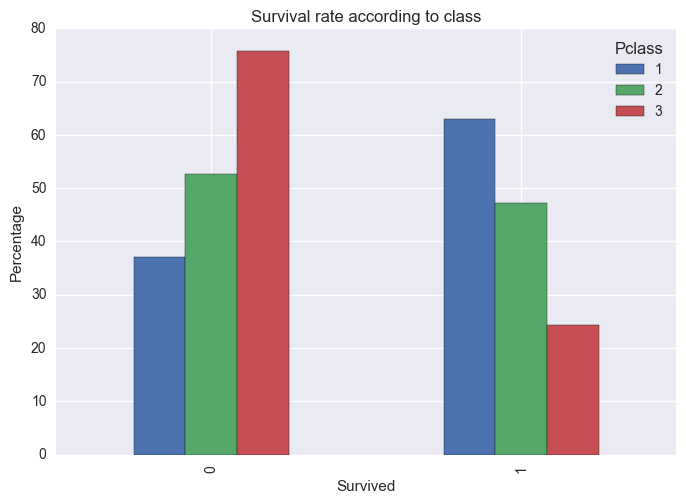

In [10]:
pct.plot(kind = 'bar' , title = 'Survival rate according to class')
plt.ylabel("Percentage")
plt.show()

As seen from the above graph the percentage of people who didn't survive (75.76%) is high in class 3.
The percentage of people who survived from class 1 is 62.96% is also high.

Q3) The percentage of survival according to sex.

Checking if there are null values.

In [11]:
sex = t_df['Sex'].isnull().any()
sex

False

False implies there are no null values in the Sex column

In [12]:
s = t_df.groupby(['Sex']).size()
s

Sex
female    314
male      577
dtype: int64

In [13]:
ss = t_df.groupby(['Survived' , 'Sex']).size().unstack()
ss

Sex,female,male
Survived,,
0,81,468
1,233,109


Again we need to calculate the percentage because the number of males is more than the number of females.

In [14]:
pct_sex = ss.groupby(level=0).apply(lambda x: 100*x/ss.sum())
pct_sex

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


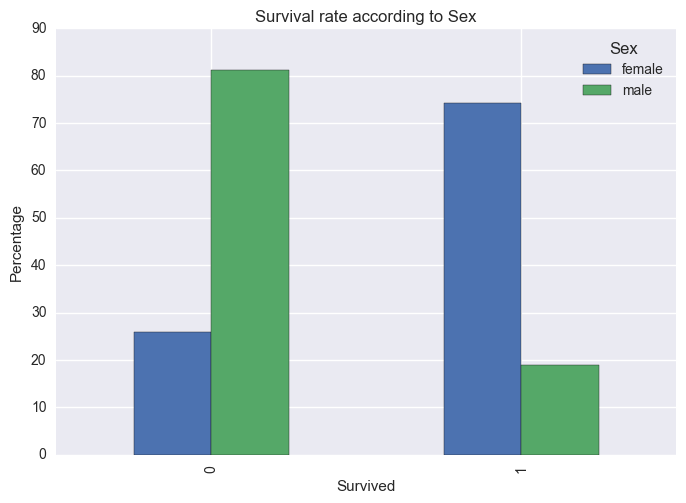

In [15]:
pct_sex.plot(kind = 'bar')
plt.ylabel('Percentage')
plt.title('Survival rate according to Sex')
plt.show()

As seen from above the percentage of female who survived (74.2 %)is significantly more than the percentage of males who survived (18.8%)

In [16]:
Ps = t_df.groupby(['Pclass' ,'Sex']).size().unstack()
Ps

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Maximum number of male and female where in class 3

Q4) The pecentage of survival taking in account class and sex.

In [17]:
sps = t_df.groupby(['Survived' , 'Pclass','Sex']).size().unstack()
sps
#sps is people who survived according to pclass and sex

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

Out of 94 females of class 1 , only 3 perished and 91 survived.

Out of 76 females of class 2 , only 6 perished and 70 survived.

However out of 144 females of class 3 , half perished and half survived.

In male population , maximum of them perished , whether they belonged to class 1,2,3.

Also , females of class 3 had 50 % chances of survival, but males of class 1 had 58.44% percent of survival. This implies males of class 1 had more chances of survival than females of class 3.


Percentage of people who survived according to pclass and sex

In [122]:
sps_percentage = sps.groupby(level=0).apply(lambda x: 100*x/sps.sum(axis=0))
sps_percentage

Sex                 female       male
Survived Pclass                      
0        1        0.955414  13.344887
         2        1.910828  15.771231
         3       22.929936  51.993068
1        1       28.980892   7.798960
         2       22.292994   2.946274
         3       22.929936   8.145581

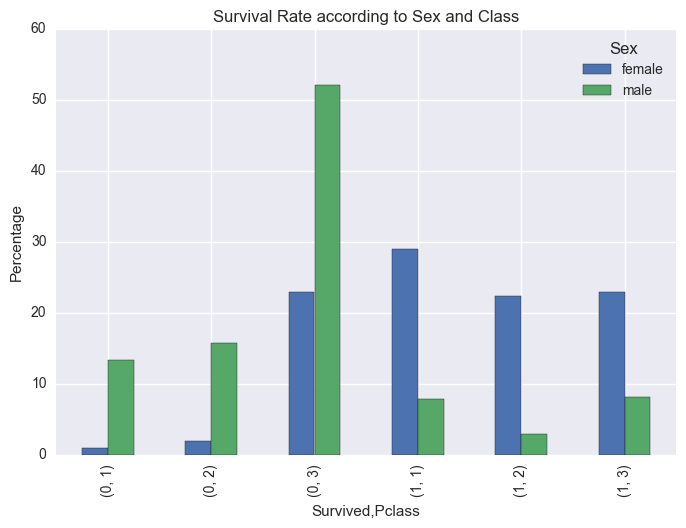

In [144]:
sps_percentage.plot.bar()
plt.ylabel('Percentage')
plt.title('Survival Rate according to Sex and Class')
plt.show()

As seen from above plot the percentage of males of class 3 who didn't ' survive is 51.99%.

The percentage of female of class 1 who survived was higher than other two classes.

This implies that a person who was male and belongs to class 3 had less chances of survival.

Of the people who survived ,maximum where ( 28.99 %) females of class 1. 

Q5) Survival rate according to age.

Checking for null values in age column

In [70]:
t_df["Age"].isnull().any()

True

There are null values in Age column.

In [71]:
t_df["Age"].isnull().sum()

177

There are 177 columns whose age is not specified.

In [77]:
Age = t_df['Age'].dropna(axis=0,how='any').describe()
print Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


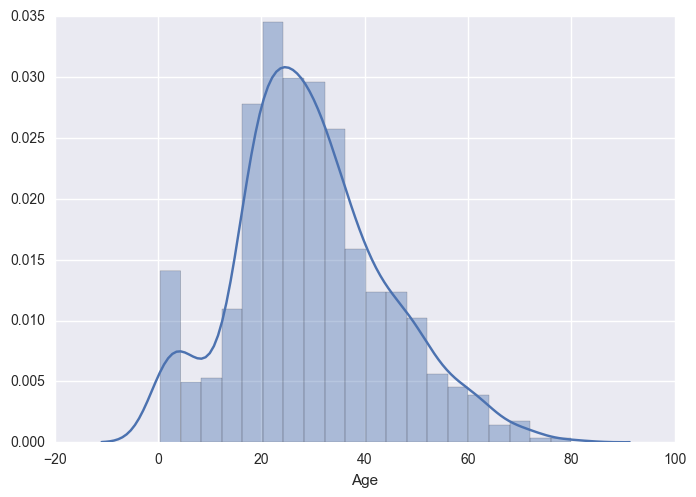

In [67]:
Age1 = t_df['Age'].dropna(axis=0,how='any')
sns.distplot(Age1);

Total entries is 891 , however the count is 714 which implies 177 entries are empty
Minimum age is 0.42 whereas maximum age is 80.
Mean is 29.69
75% of people are below 38 yrs of age , this implies that maximum people are 20-38yrs.

#Analysing the survival rate for children

If we fill the null values with 0 and count the age group below 5 yrs of age it will give us a  wrong result because it will take into consideration 0 values also. So in this case it will better to discard the null values.

In [26]:
countof5 = t_df.loc[t_df.Age < 5 , 'Survived'].count()
countof5

40

The above implies that there were 40 children whose age was less than 5

In [27]:
at = t_df['Age'].fillna(0)
at[at < 5].count()


217

As we can see from above it shows 217 entries with age less than 5 however there are only 40 entries with age less than 5. So filling the null values is not beneficial here.

In [28]:
countof10 = t_df.loc[t_df.Age < 10 ,'Survived'].count()
countof10

62

The above implies that there were (62-40 = 22 ) children whose age was between 5 to 10 

In [29]:
spa = t_df.groupby([ 'Survived', t_df.Age < 10 ]).size().unstack()
spa

#spa is survived according to pclass and age 

Age,False,True
Survived,,
0,525,24
1,304,38


Out of 62 children 38 survived and 24 didn't

In [30]:
spa = t_df.groupby([ t_df.Survived , t_df.Age < 10 , 'Pclass']).size().unstack()
spa

Pclass              1     2      3
Survived Age                      
0        False   79.0  97.0  349.0
         True     1.0   NaN   23.0
1        False  134.0  70.0  100.0
         True     2.0  17.0   19.0

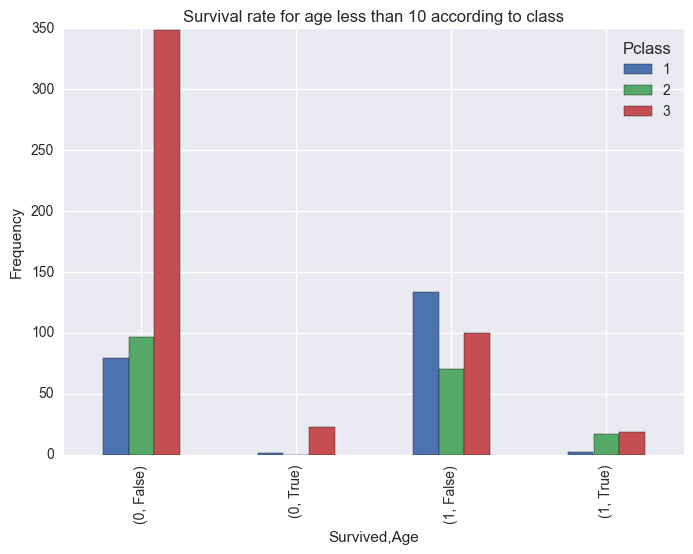

In [31]:
spa.plot.bar()
plt.ylabel('Frequency')
plt.title('Survival rate for age less than 10 according to class')
plt.show()

Children aged below 10 :

class 1 had total of 3 , out of which 2 survived and 1 didn't.

class 2 had total of 17 , out of which all survived.

class 3 had total of 42 , out of which 19 survived and 23 didn't.

The above analyses implies that class 2 children had higher chances of survival as none of them died.But this can't be a complete analysis because there were very less number of children aged below 10 in class 1 , and there could be others factors like maybe some children didn't want to leave their parents etc. 


Boxplot to understand the better about survival according to age.

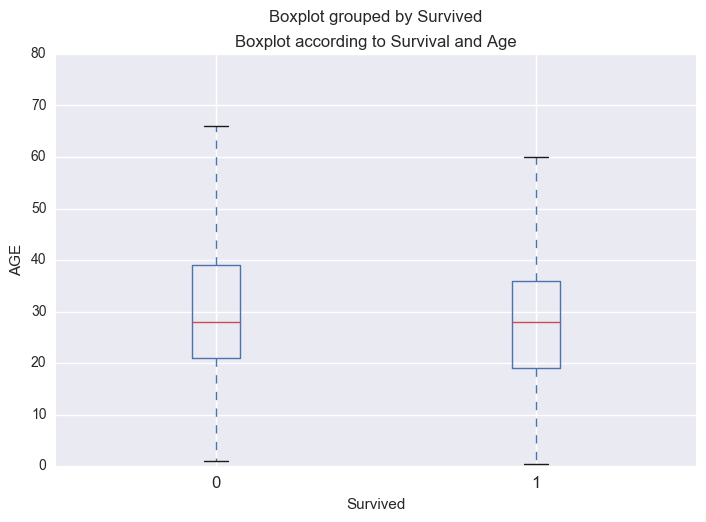

In [32]:
t_df.boxplot(column=['Age'],by=['Survived'])
plt.title('Boxplot according to Survival and Age')
plt.xlabel('Survived')
plt.ylabel('AGE')
plt.show()

Analysis of elderly people above age 50

In [56]:
spa50 = t_df.groupby([ 'Survived', t_df.Age > 50 , 'Sex' ]).size().unstack()
spa50

Sex             female  male
Survived Age                
0        False      80   427
         True        1    41
1        False     217   103
         True       16     6

The above implies out of 17 females above the age of 50 , 16 survived and 1 didn't . 

Out of 47 males above 50 , 41 didn't survive and 6 did survive.

This implies female above the age of 50 had higher chances of survival than males above the age of 50.

Females of age above 50 also had higher chances of survival.

In [57]:
sp50 = t_df.groupby([ 'Survived', t_df.Age > 50 , 'Sex' ,'Pclass']).size().unstack()
sp50

Pclass                    1     2      3
Survived Age   Sex                      
0        False female   3.0   5.0   72.0
               male    56.0  80.0  291.0
         True  female   NaN   1.0    NaN
               male    21.0  11.0    9.0
1        False female  78.0  68.0   71.0
               male    40.0  16.0   47.0
         True  female  13.0   2.0    1.0
               male     5.0   1.0    NaN

None of the class 1 females aged above 50 died.

Q 6) Analysis of survival rate according to fare?

In [35]:
Fare = t_df['Fare'].describe()
Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Lowest fare is 0 and max fare is 512.
75% of all the fare is below 31 , this implies there were very less below whose ticket prices were high.

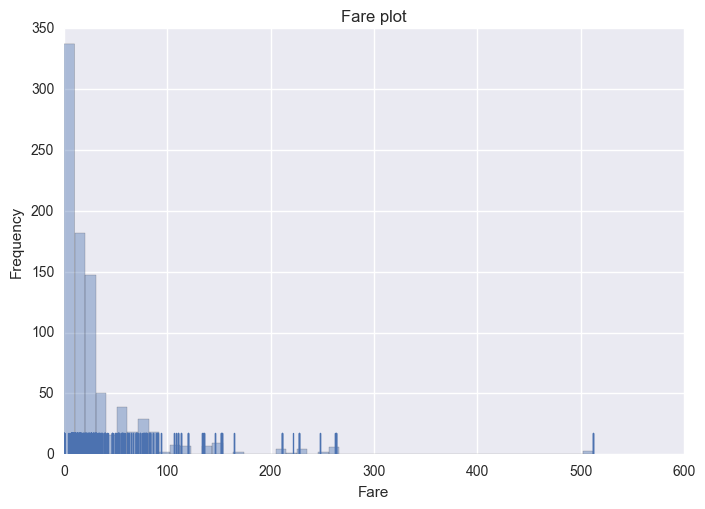

In [36]:
Fare = t_df['Fare']
labels ='Fare' , 'Frequency'
sns.distplot(Fare, kde=False, rug=True );
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare plot')

The plot of Fare is positively skewed , maximum number of people have fare below 50.

In [65]:
f8 = t_df[t_df.Fare < 8].count()
f8

PassengerId    241
Survived       241
Pclass         241
Name           241
Sex            241
Age            161
SibSp          241
Parch          241
Ticket         241
Fare           241
Cabin            8
Embarked       241
dtype: int64

As a lot of people had fare less than 8 , I will be analysing the survival rate for the same.


In [59]:
fp = t_df.groupby([ t_df.Fare < 8 ,'Pclass' ]).size().unstack()
fp

Pclass,1,2,3
Fare,,,
False,210,178,262
True,6,6,229


Not all the people whose fare was less belonged to class 3 .

6 people belonged to class 1 and class 2. (Reason unknown)

However maximum belonged to class 3.

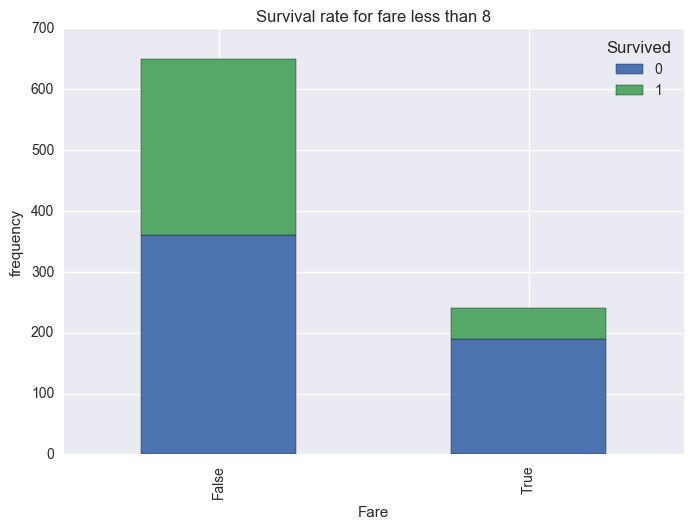

In [37]:
spt = t_df.groupby([ t_df.Fare < 8 ,'Survived' ]).size().unstack()
spt
spt.plot.bar(stacked =True)
plt.ylabel('frequency')
plt.title('Survival rate for fare less than 8')
plt.show(True)

We are concerned with the  true part which is fare less than 8 ,  The number of people who perished were more than the number of people who survived.

In [66]:
f10 = t_df[t_df.Fare > 100].count()
f10

PassengerId    53
Survived       53
Pclass         53
Name           53
Sex            53
Age            48
SibSp          53
Parch          53
Ticket         53
Fare           53
Cabin          43
Embarked       53
dtype: int64

As we can see above a very less fraction of people had fare greater than 100.

I will be analysing the survival chances for these people.

In [38]:
spt = t_df.groupby([ t_df.Fare > 100 ,'Survived' ]).size().unstack()
spt

Survived,0,1
Fare,,
False,535,303
True,14,39


39 people survived and 14 people perished whose ticket fare was greater than 100.

Better visualization of survival chances according to fare.

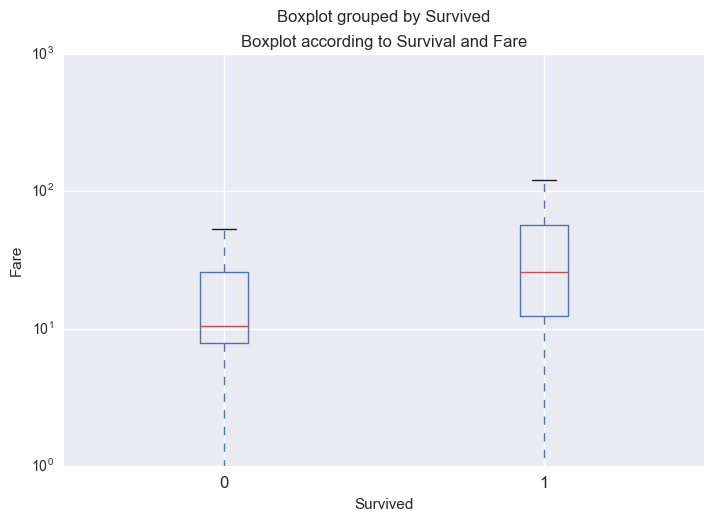

In [39]:
t_df.boxplot(column=['Fare'],by=['Survived']).set_yscale('log')
plt.title('Boxplot according to Survival and Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

Q 7) Survival rate according to ports .

In [40]:
embarked = t_df['Embarked'].describe()
embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [41]:
spe = t_df.groupby(['Survived' , 'Embarked']).size().unstack()
spe

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [42]:
pct_spe = spe.groupby(level=0).apply(lambda x: 100*x/spe.sum())
pct_spe

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


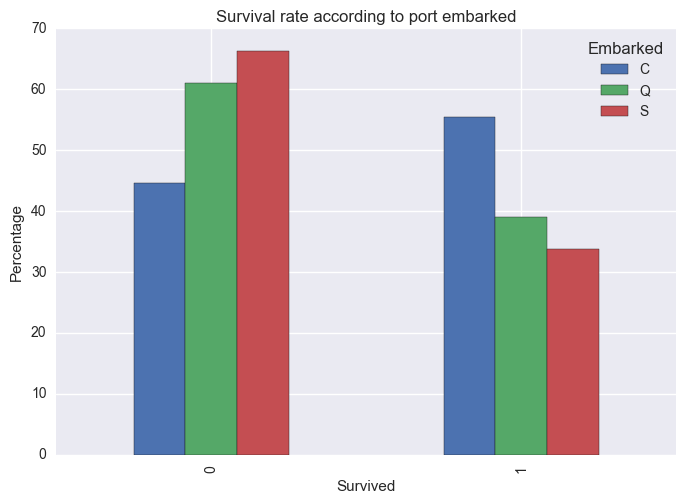

In [43]:
pct_spe.plot.bar()
plt.ylabel('Percentage')
plt.title('Survival rate according to port embarked')
plt.show()

The above plot shows that people who embarked from S had a lower chance of survival.

The people who embarked from C had a higher chance of survival.

In [44]:
spes = t_df.groupby(['Survived' ,'Pclass','Embarked']).size().unstack()
spes

Embarked          C   Q    S
Survived Pclass             
0        1       26   1   53
         2        8   1   88
         3       41  45  286
1        1       59   1   74
         2        9   2   76
         3       25  27   67

In [45]:
pct_spes = spes.groupby(level=0).apply(lambda x: 100*x/spes.sum())
pct_spes

Embarked                 C          Q          S
Survived Pclass                                 
0        1       15.476190   1.298701   8.229814
         2        4.761905   1.298701  13.664596
         3       24.404762  58.441558  44.409938
1        1       35.119048   1.298701  11.490683
         2        5.357143   2.597403  11.801242
         3       14.880952  35.064935  10.403727

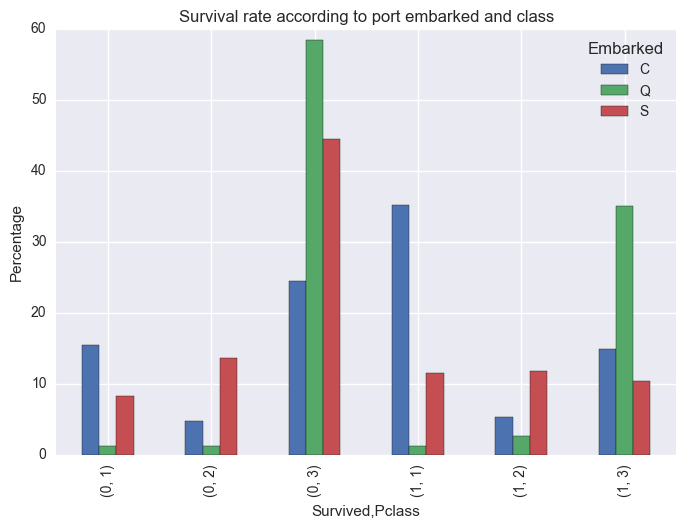

In [68]:
pct_spes.plot.bar()
plt.title('Survival rate according to port embarked and class')
plt.ylabel('Percentage')
plt.show()

The above plot shows that people who belonged to class 1 and embarked from C  had higher chances of survival.

Q 8) Survival rate according to place embarked and sex .

In [47]:
se = t_df.groupby(['Sex','Embarked']).size().unstack()
se

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


Maximum number of male /female embarked from port S.

In [48]:
ses = t_df.groupby(['Embarked','Sex','Survived' ]).size().unstack()
ses

Survived           0    1
Embarked Sex             
C        female    9   64
         male     66   29
Q        female    9   27
         male     38    3
S        female   63  140
         male    364   77

According to above data , females who embarked from port C had higher chances of survival.

In [49]:
sse_percentage = ses.groupby(level=0).apply(lambda x: 100*x/ses.sum())
sse_percentage

Survived                 0          1
Embarked Sex                         
C        female   1.639344  18.823529
         male    12.021858   8.529412
Q        female   1.639344   7.941176
         male     6.921676   0.882353
S        female  11.475410  41.176471
         male    66.302368  22.647059

Of the people who survived , 41.17 percent were from port S but the number females from port S were also more.
So this doesn't help us identify correctly the survival rate.

Distribution according to Age , Sex , Port Embarked :

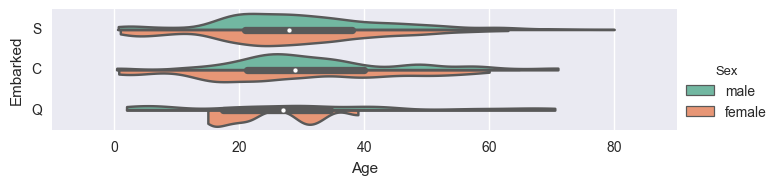

In [50]:
AgeClassSex = sns.factorplot(x='Age', y="Embarked", hue="Sex",data=t_df[t_df.Embarked.notnull()], orient="h", size=2, aspect=3.5, palette="Set2", kind="violin", split=True, cut=0, bw=.2)

Class 1 contained people of age more than 70 .

Q 9) What was the distribution according to age , class ,sex , embarked ?

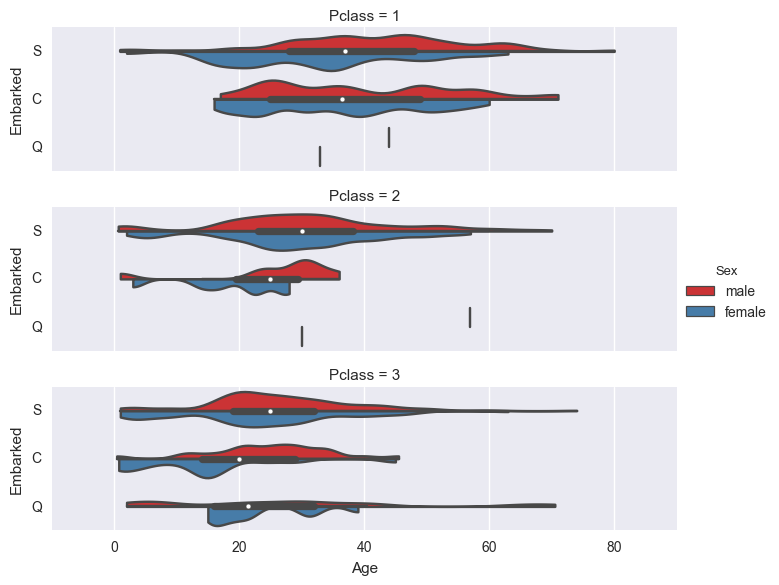

In [51]:
AgeClassSexE = sns.factorplot(x='Age', y="Embarked",hue="Sex", row="Pclass",data=t_df[t_df.Embarked.notnull()],orient="h", size=2, aspect=3.5, palette="Set1", kind="violin", split=True, cut=0, bw=.2)

The above plot shows class 1 people embarked more from S.

Class 3 people embarked more from Q.

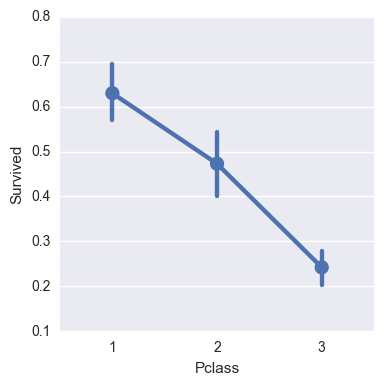

In [52]:
ClassSurvived = sns.factorplot(x='Pclass', y='Survived', data=t_df)

The above plot shows survival rate of class 1 > class 2 > class 3

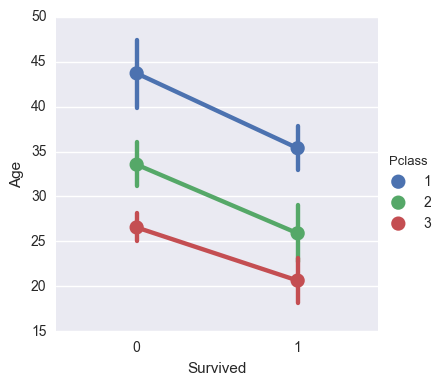

In [53]:
SurvivedAgeClass = sns.factorplot(x='Survived', y='Age',hue='Pclass',  data=t_df)

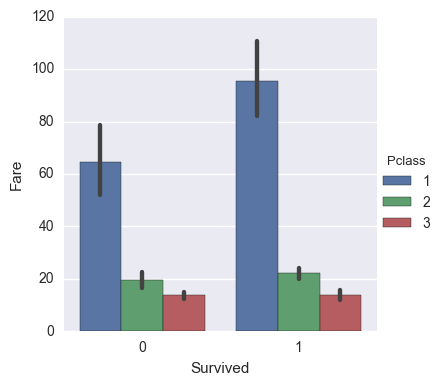

In [54]:
FareSurvived = sns.factorplot(x='Survived', y='Fare',kind='bar',hue='Pclass',data=t_df)

The fare of class 1 was significantly higher , their chnaces of survival was also high.


CONCLUSION:

Females , children , class 1 and people who embarked from port C had more chances of survival.

Females of class 1 had 96.8% chances of survival , of class 2 had 92.10% chances of survival , of class 3 had 50% chances of survival.

Females of class 3 had 50 % chances of survival, but males of class 1 had 58.44% percent of survival. This implies males of class 1 had more chances of survival than females of class 3.

Analysis of children according to class is not clear because not enough data is provived for the same.

The rate of survival of class 3 people was very less.

People who embarked from port S had lower chances of survival.


However we can not rely totally on this data because there might be other factors that might have influenced the survival of particular group.

There is a possiblity that people of class had their cabins located near the boats, so they were rescued first.

There are many columns whose values are missing such as AGE , CABIN , EMBARKED which limit our analysis of data.


    